<a href="https://colab.research.google.com/github/AASTHA1102/Machine-Learning/blob/main/Regression_Bouston_Housing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Title: Boston Housing Data

2. Sources:

   (a) Origin:  This dataset was taken from the StatLib library which is maintained at          Carnegie Mellon University.

   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management,vol.5, 81-102, 1978.
   
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class" attribute "MEDV"), 1 binary-valued attribute.

7. Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

8. Missing Attribute Values:  None.





Performance measure : RMSE

In [ ]:
  import pandas as pd
  import numpy as np
  import sklearn
  import seaborn as sns

In [ ]:
housing = pd.read_csv("houseData.csv")

data analyse 

In [ ]:
print(housing.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [ ]:
# to check if any missing data is available
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


In [ ]:
 housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [ ]:
housing['ZN'].value_counts()

0.0      372
20.0      21
80.0      15
22.0      10
12.5      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
95.0       4
60.0       4
21.0       4
33.0       4
55.0       3
70.0       3
34.0       3
52.5       3
35.0       3
28.0       3
75.0       3
82.5       2
85.0       2
17.5       1
100.0      1
18.0       1
Name: ZN, dtype: int64

Housing.describe()..


*   COUNT: counts number of data (ignores space)
*   MEAN: Avg/count
*   STD: standard Variation
*   MIN: minimum value
*   25%:the percentage of values less than a value given
*   50%:the percentage of values less than a value given
*   75%:the percentage of values less than a value given
*   MAX:maximum values









In [ ]:
print(housing.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt


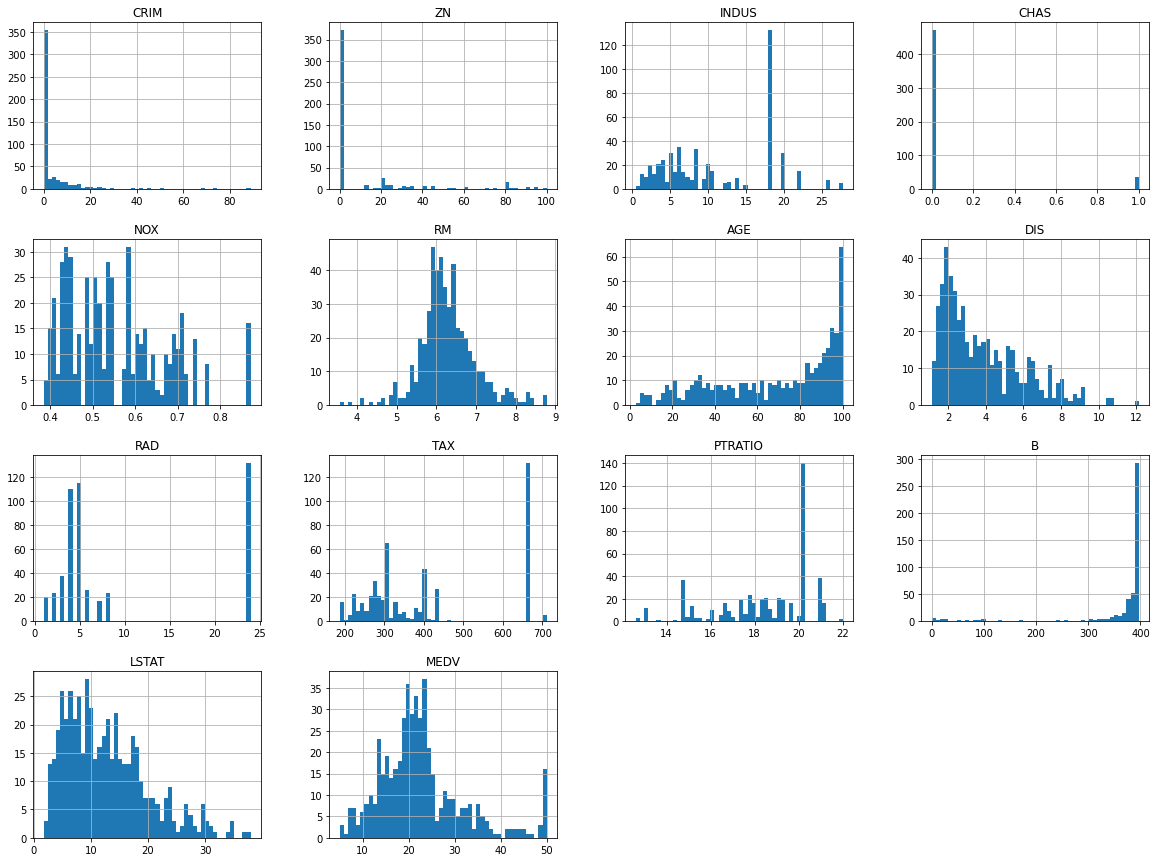

In [ ]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

TRAIN_TEST SPLITTING

In [ ]:
def split_train_test(data,test_ratio):
  np.random.seed(42)
  shuffled=np.random.permutation(len(data))
  test_set_size = int(len(data)*test_ratio)
  test_indices = shuffled[:test_set_size]
  train_indices = shuffled[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
train_set, test_set =split_train_test(housing, 0.2)

In [ ]:
print("Rows in Train set:", len(train_set) )
print("Rows in Test set:", len(test_set))

Rows in Train set: 405
Rows in Test set: 101


In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set =train_test_split(housing, test_size=0.2, random_state=42)
print("Rows in Train set:", len(train_set) )
print("Rows in Test set:", len(test_set))

Rows in Train set: 404
Rows in Test set: 102


statified sampling

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
  strat_train_Set = housing.loc[train_index]
  strat_test_Set = housing.loc[test_index]

In [ ]:
print(strat_test_Set)

         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
342   0.02498   0.0   1.89     0  0.518  6.540   59.7  6.2669    1  422   
379  17.86670   0.0  18.10     0  0.671  6.223  100.0  1.3861   24  666   
223   0.61470   0.0   6.20     0  0.507  6.618   80.8  3.2721    8  307   
219   0.11425   0.0  13.89     1  0.550  6.373   92.4  3.3633    5  276   
48    0.25387   0.0   6.91     0  0.448  5.399   95.3  5.8700    3  233   
..        ...   ...    ...   ...    ...    ...    ...     ...  ...  ...   
88    0.05660   0.0   3.41     0  0.489  7.007   86.3  3.4217    2  270   
466   3.77498   0.0  18.10     0  0.655  5.952   84.7  2.8715   24  666   
52    0.05360  21.0   5.64     0  0.439  6.511   21.1  6.8147    4  243   
121   0.07165   0.0  25.65     0  0.581  6.004   84.1  2.1974    2  188   
218   0.11069   0.0  13.89     1  0.550  5.951   93.8  2.8893    5  276   

     PTRATIO       B  LSTAT  MEDV  
342     15.9  389.96   8.65  16.5  
379     20.2  393.74  21.78

In [ ]:
print(strat_test_Set.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  102.000000  102.000000  102.000000  102.000000  102.000000  102.000000   
mean     3.655942   13.450980   10.312255    0.068627    0.541353    6.303353   
std     10.400966   27.503241    6.761154    0.254068    0.111397    0.662996   
min      0.009060    0.000000    0.460000    0.000000    0.385000    4.138000   
25%      0.057827    0.000000    4.950000    0.000000    0.448000    5.912750   
50%      0.176150    0.000000    7.760000    0.000000    0.515000    6.176000   
75%      2.061955    0.000000   18.100000    0.000000    0.612750    6.539500   
max     88.976200   90.000000   27.740000    1.000000    0.871000    8.725000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  102.000000  102.000000  102.000000  102.000000  102.000000  102.000000   
mean    66.733333    3.988460    8.813725  391.980392   18.385294  369.670196   
std     27.772183    2.1312

In [ ]:
print(strat_test_Set.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 342 to 218
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     102 non-null    float64
 1   ZN       102 non-null    float64
 2   INDUS    102 non-null    float64
 3   CHAS     102 non-null    int64  
 4   NOX      102 non-null    float64
 5   RM       102 non-null    float64
 6   AGE      102 non-null    float64
 7   DIS      102 non-null    float64
 8   RAD      102 non-null    int64  
 9   TAX      102 non-null    int64  
 10  PTRATIO  102 non-null    float64
 11  B        102 non-null    float64
 12  LSTAT    102 non-null    float64
 13  MEDV     102 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 12.0 KB
None


In [ ]:
print(strat_test_Set['CHAS'].value_counts())

0    95
1     7
Name: CHAS, dtype: int64


In [ ]:
print(strat_train_Set)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
254  0.04819  80.0   3.64     0  0.392  6.108  32.0  9.2203    1  315   
348  0.01501  80.0   2.01     0  0.435  6.635  29.7  8.3440    4  280   
476  4.87141   0.0  18.10     0  0.614  6.484  93.6  2.3053   24  666   
321  0.18159   0.0   7.38     0  0.493  6.376  54.3  4.5404    5  287   
326  0.30347   0.0   7.38     0  0.493  6.312  28.9  5.4159    5  287   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
155  3.53501   0.0  19.58     1  0.871  6.152  82.6  1.7455    5  403   
423  7.05042   0.0  18.10     0  0.614  6.103  85.1  2.0218   24  666   
98   0.08187   0.0   2.89     0  0.445  7.820  36.9  3.4952    2  276   
455  4.75237   0.0  18.10     0  0.713  6.525  86.5  2.4358   24  666   
216  0.04560   0.0  13.89     1  0.550  5.888  56.0  3.1121    5  276   

     PTRATIO       B  LSTAT  MEDV  
254     16.4  392.89   6.57  21.9  
348     17.0  390.94   5.99  24.5  
476     20.2  3

In [ ]:
print(strat_train_Set.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean     3.602814   10.836634   11.344950    0.069307    0.558064    6.279908   
std      8.099383   22.150636    6.877817    0.254290    0.116875    0.712983   
min      0.006320    0.000000    0.740000    0.000000    0.389000    3.561000   
25%      0.086962    0.000000    5.190000    0.000000    0.453000    5.878750   
50%      0.286735    0.000000    9.900000    0.000000    0.538000    6.210000   
75%      3.731923   12.500000   18.100000    0.000000    0.631000    6.630250   
max     73.534100  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean    69.039851    3.746210    9.735149  412.341584   18.473267  353.392822   
std     28.258248    2.0990

In [ ]:
print(strat_train_Set.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 254 to 216
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.3 KB
None


In [ ]:
print(strat_train_Set['CHAS'].value_counts())

0    376
1     28
Name: CHAS, dtype: int64


In [ ]:
housing = strat_train_Set.copy()

LOOKING FOR CORRELATION

In [ ]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending= False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f03173e4cd0>,
      dtype=object)

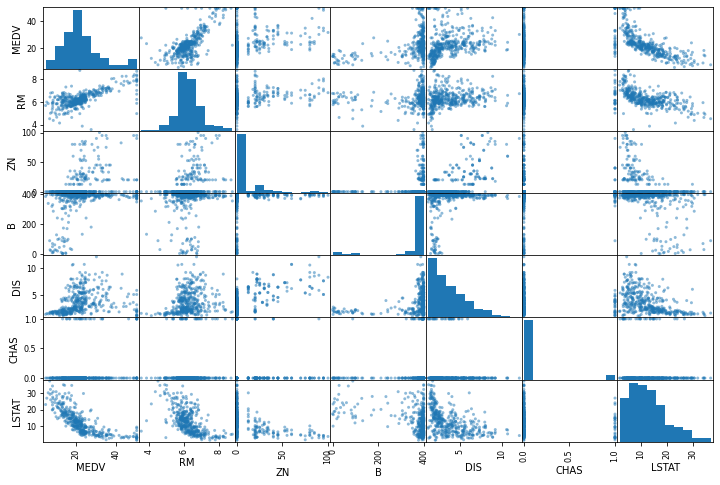

In [ ]:
from pandas.plotting import scatter_matrix
attributes=["MEDV","RM","ZN","B","DIS","CHAS","LSTAT"]
scatter_matrix(housing[attributes],figsize = (12,8))

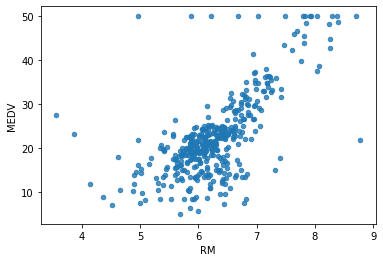

In [ ]:
housing.plot(kind="scatter",x="RM", y="MEDV", alpha=0.8)
# to check if we have outlets and remove them to get cleaner data and the model
# will get well trained as it will not get confused due to these outlets data

Trying Out Attribute Combinations

In [ ]:
housing["TAXRM"] = housing['TAX']/housing['RM']
print(housing["TAXRM"])

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: TAXRM, Length: 404, dtype: float64


In [ ]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending= False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.525160
LSTAT     -0.740494
Name: MEDV, dtype: float64

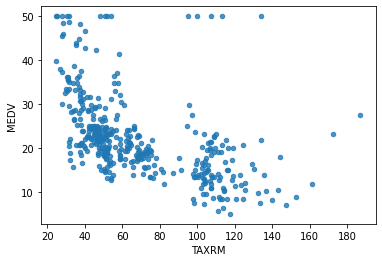

In [ ]:
housing.plot(kind="scatter",x="TAXRM", y="MEDV", alpha=0.8)



---
# **MISSING ATTRIBUTES**
---
To take care of the missing attributes, you have 3 options:

1. Get rid of the missing data points
2. Get rid of the whole attributes
3. Set the value to some value(0, mean or median)
---

In [ ]:
# # option 1
# a=housing.dropna(subset=["RM"]) 
# print(a.shape)

# # option 2
# housing.drop("RM", axis=1).shape

# option 3
median = housing["RM"].median()
housing["RM"].fillna(median)
housing.shape

from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

imputer.statistics_
imputer.statistics_.shape
X=imputer.transform(housing)
housing_tr=pd.DataFrame(X,columns=housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279908,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406,67.480852
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712983,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531,31.457774
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000,24.645639
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000,44.801475
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.210000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000,53.947454
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000,98.317507
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000,187.026116
